In [6]:
import pandas as pd
pd.set_option('display.max_columns', 999)

In [24]:
df = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/Cannabis-Predictions/final.csv')

In [25]:
df.head()

,Unnamed: 0,type,name,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,rating,None,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,thc,cbd
0,52,0,afpak,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,5,1,5,4.2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53,2,african,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,5,1,5,3.9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,2,afternoon delight,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,5,4,6,4.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,2,afwreck,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,5,1,5,4.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,57,1,agent orange,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,4.2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
len(df)

1583

In [27]:
df = df.drop(columns=['Unnamed: 0'])

### Data Fun

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')

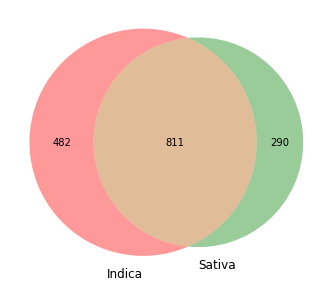

In [28]:
plt.figure(figsize=(10,5))
venn2(subsets=(len(df[df['type']==0]),len(df[df['type']==1]),len(df[df['type']==2])),set_labels=('Indica','Sativa'))

<Figure size 720x360 with 0 Axes>

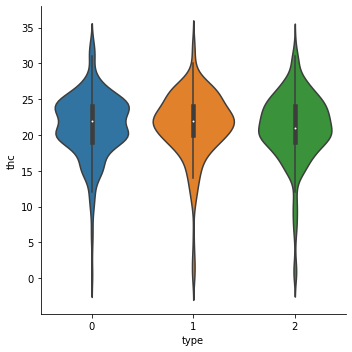

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(x='type',y='thc',kind='violin',data=df)

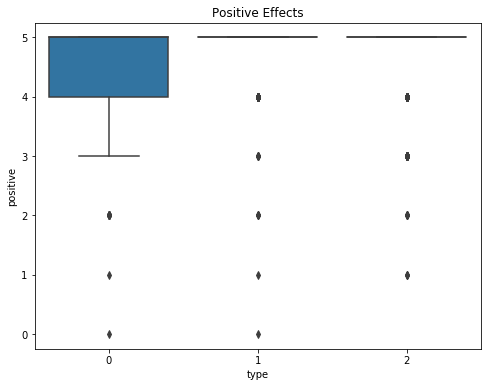

In [36]:
plt.figure(figsize=(8,6))
plt.title('Positive Effects')
sns.boxplot(x='type',y='positive',data=df)

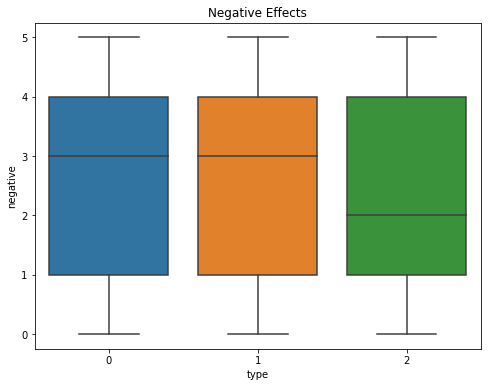

In [37]:
plt.figure(figsize=(8,6))
plt.title('Negative Effects')
sns.boxplot(x='type',y='negative',data=df)

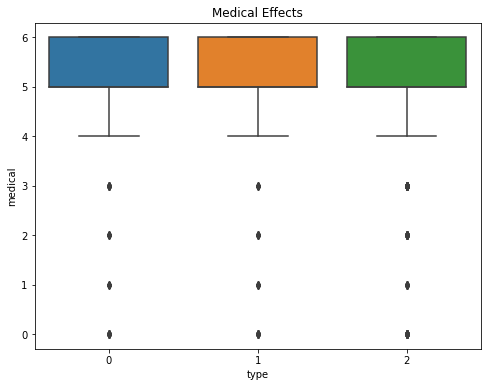

In [38]:
plt.figure(figsize=(8,6))
plt.title('Medical Effects')
sns.boxplot(x='type',y='medical',data=df)

Probability of Indica: 0.3044851547694251
Probability of Sativa: 0.1831964624131396
Probability of Hybrid: 0.5123183828174352


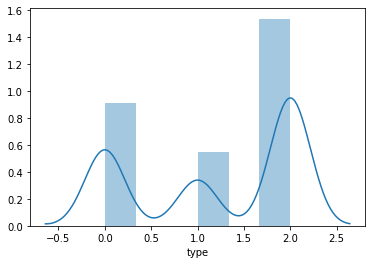

In [39]:
# class imbalance

indicadf=df[df['type']==0]
sativadf=df[df['type']==1]
hybriddf=df[df['type']==2]

sns.distplot(df['type'])
prind=len(indicadf)/len(df)
prsat=len(sativadf)/len(df)
prhyb=len(hybriddf)/len(df)
print('Probability of Indica: {}'.format(prind))
print('Probability of Sativa: {}'.format(prsat))
print('Probability of Hybrid: {}'.format(prhyb))

In [40]:
columns = list(df.keys())
columns

In [58]:
effects = columns[2:35]
tastes = columns[40:-2]

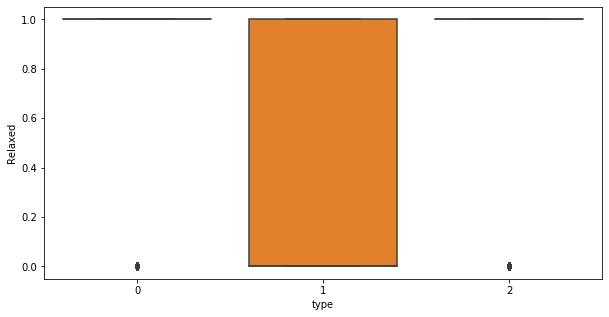

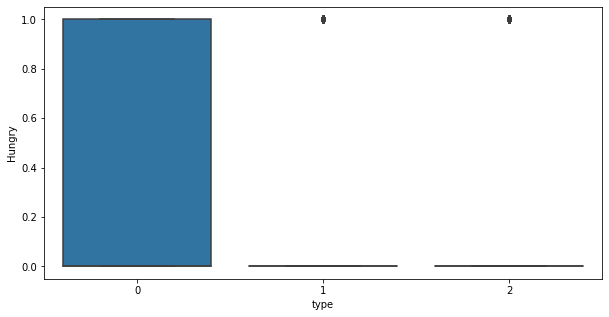

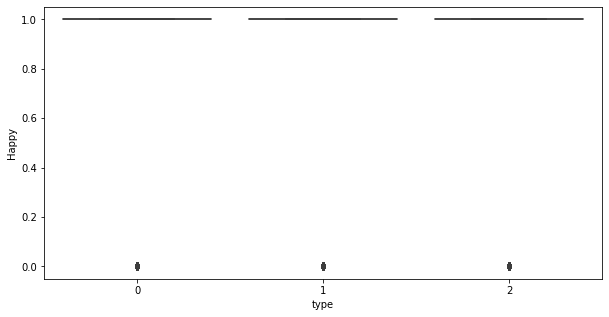

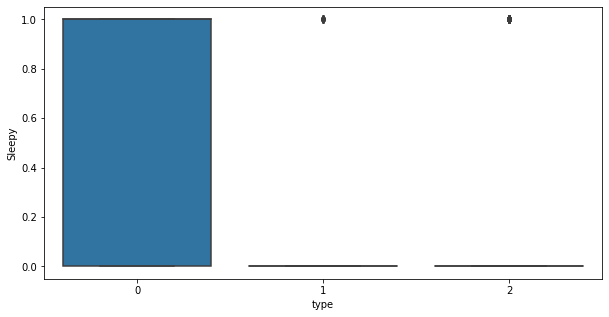

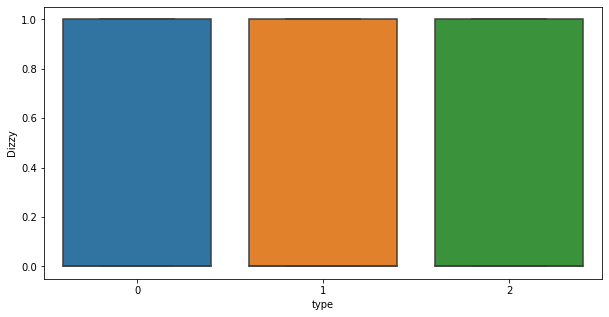

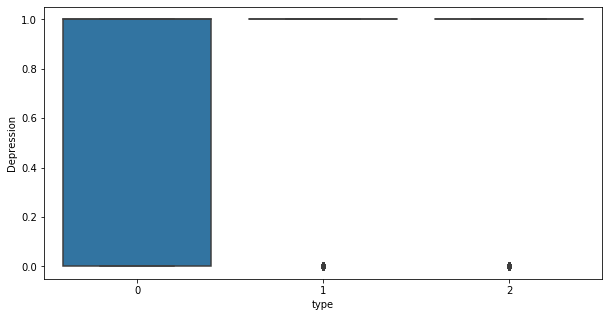

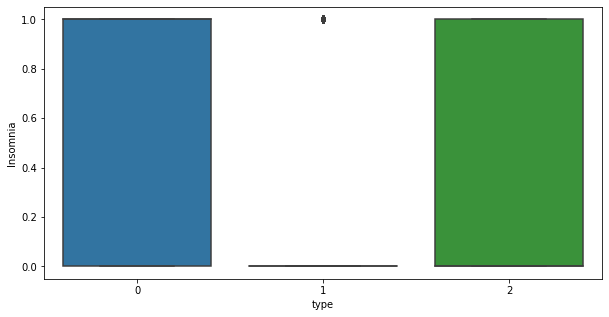

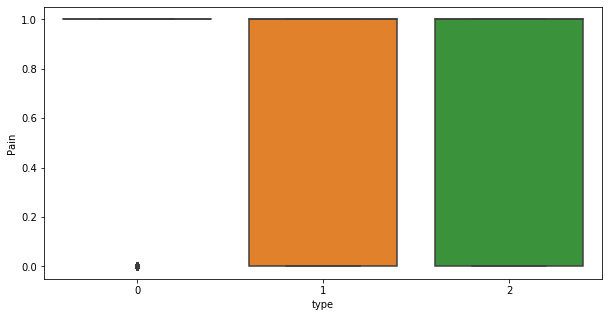

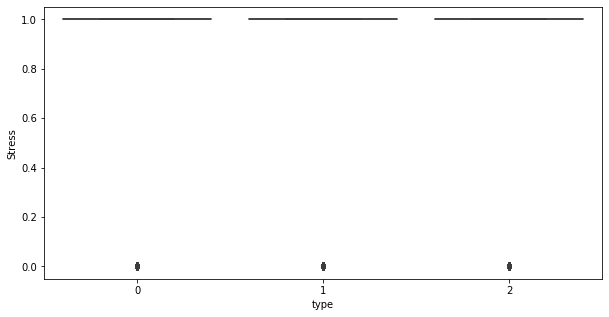

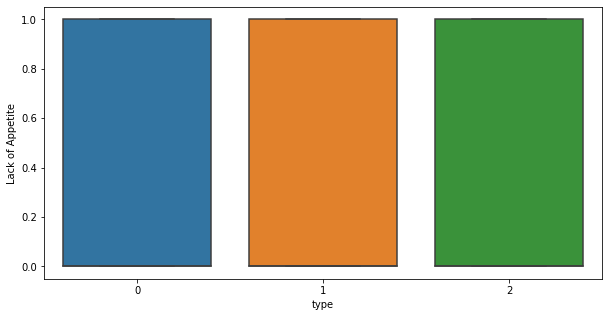

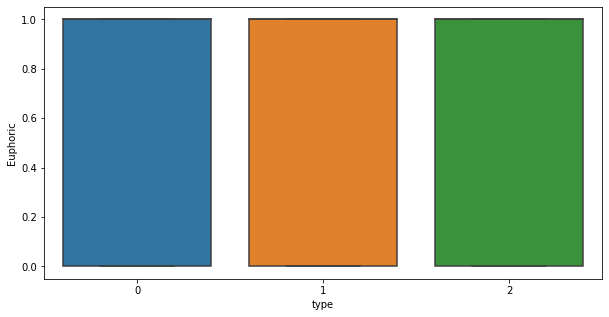

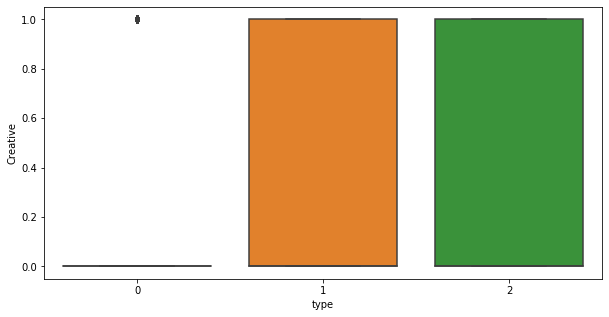

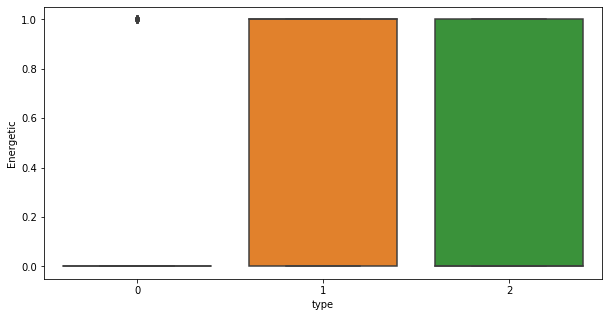

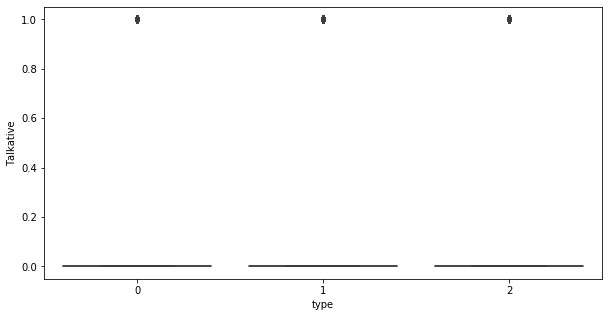

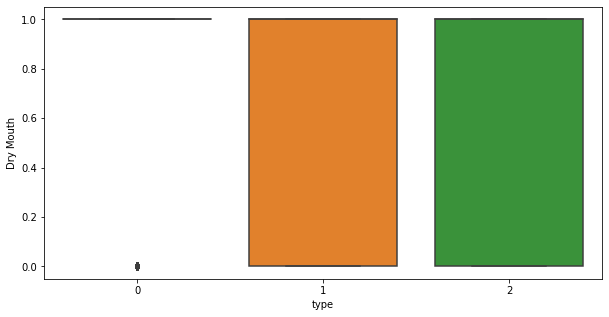

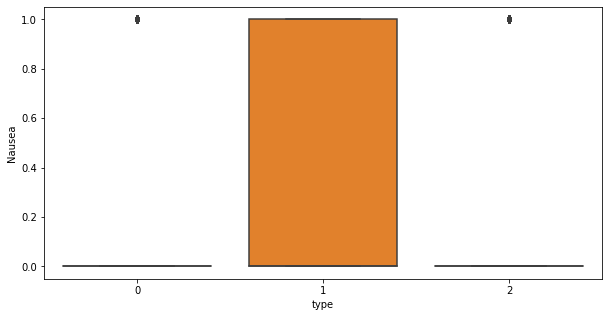

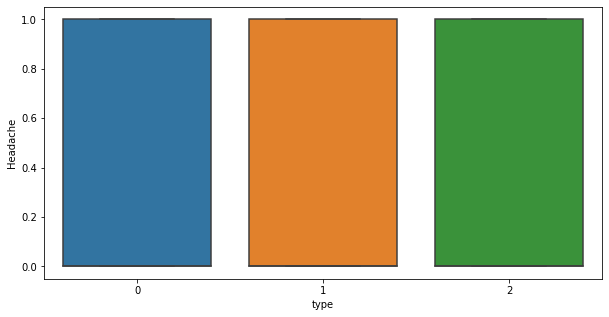

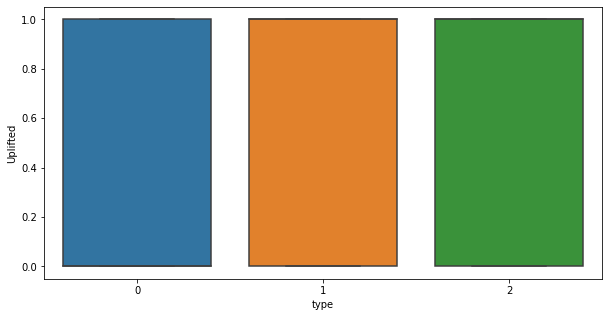

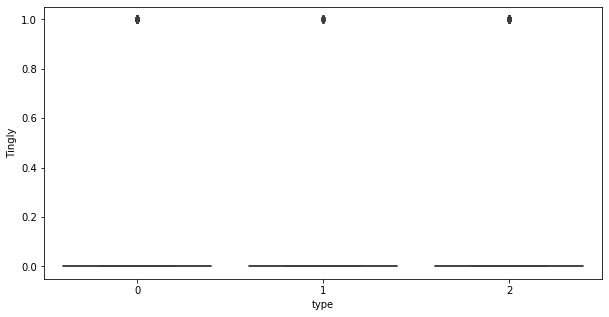

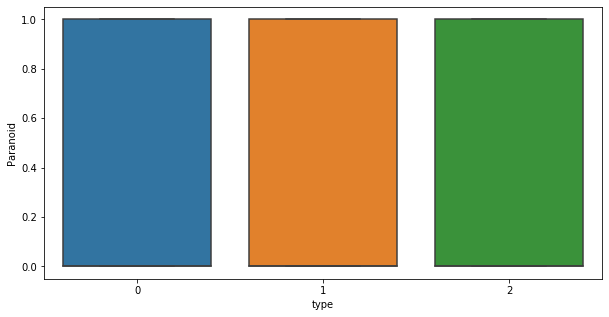

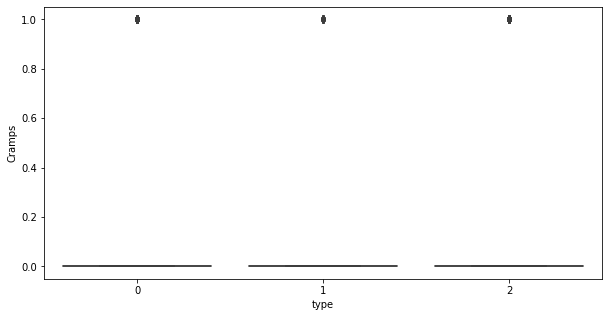

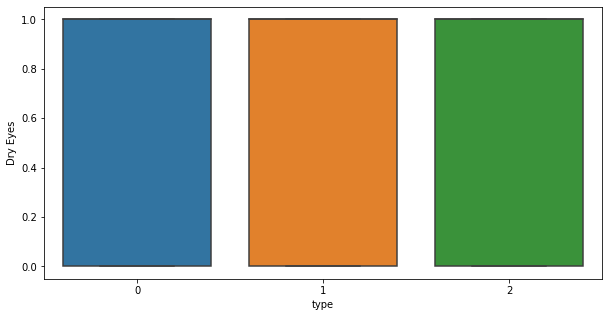

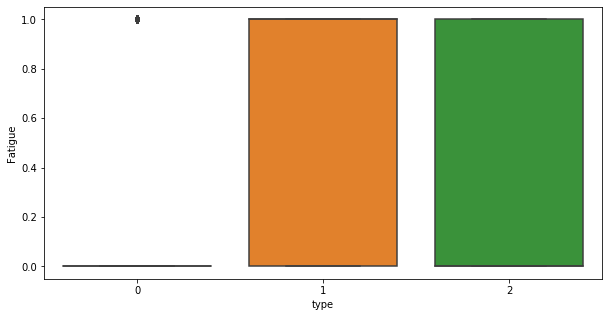

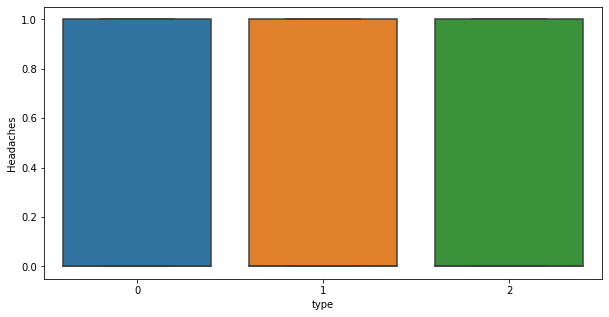

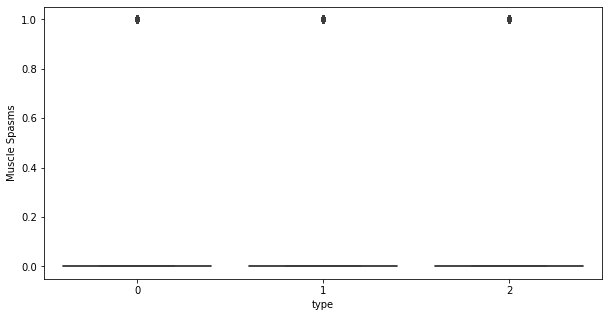

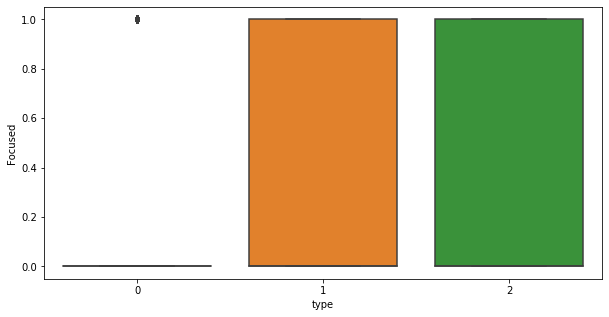

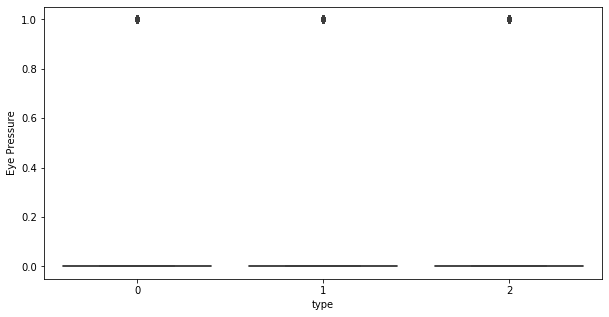

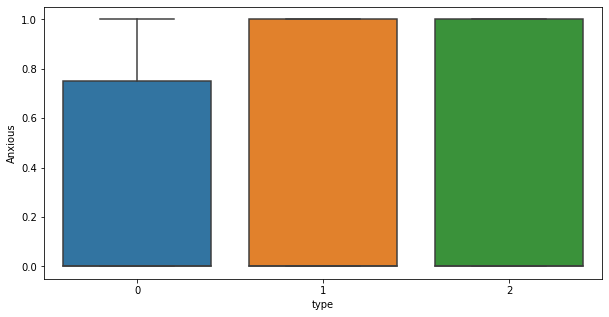

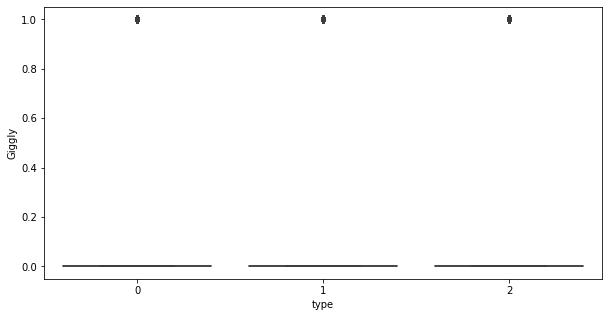

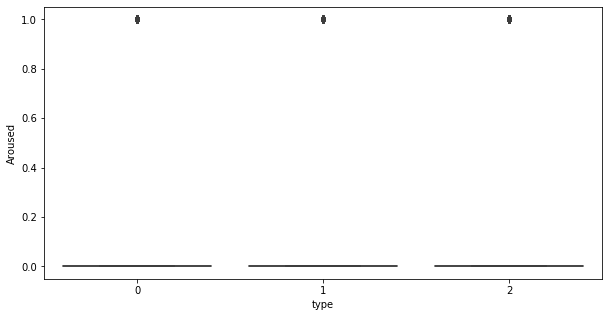

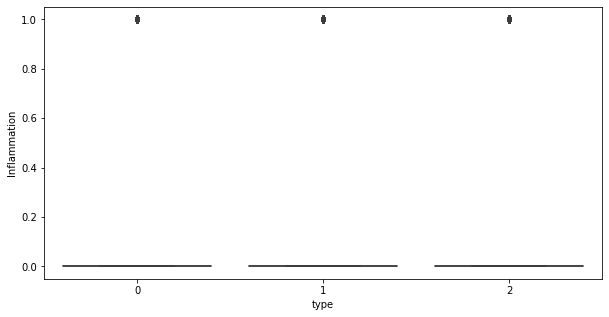

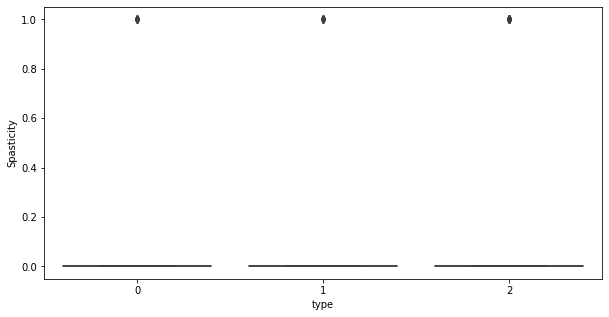

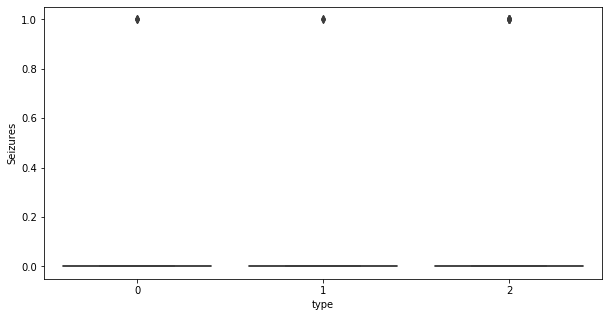

In [64]:
for e in effects:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='type',y=e,data=df)


In [200]:
len(effects)

33

In [203]:
len(tastes)

49

In [ ]:
for i in range(0, 50, 2):
    g = sns.PairGrid(df,
                     x_vars = tastes[i:i+5],
                     y_vars = ['type'])
    g = g.map(sns.kdeplot)

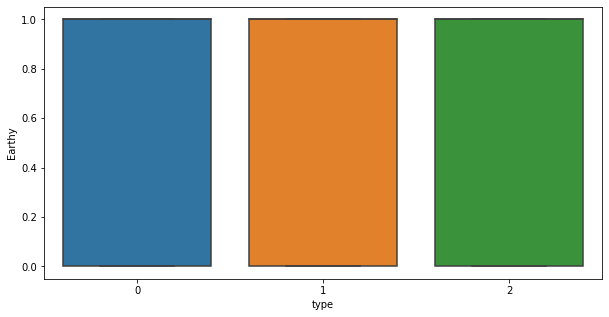

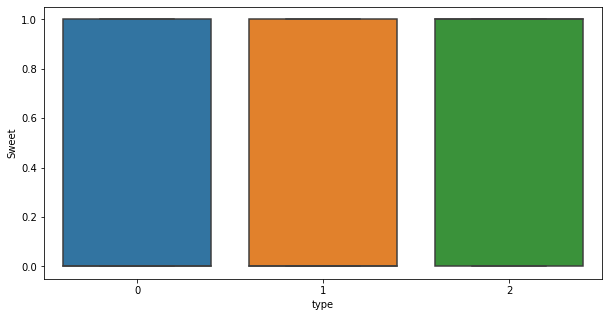

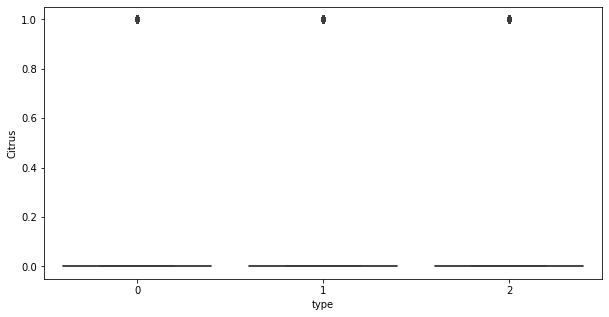

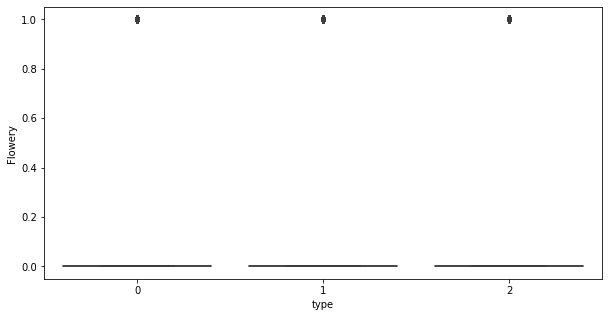

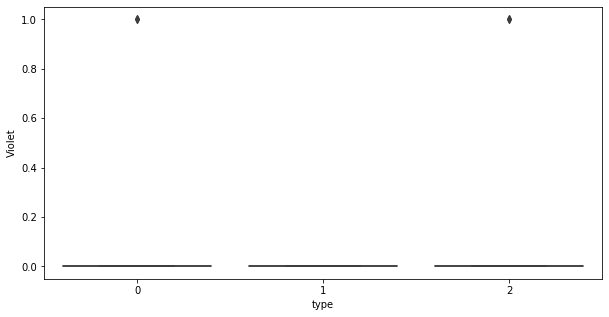

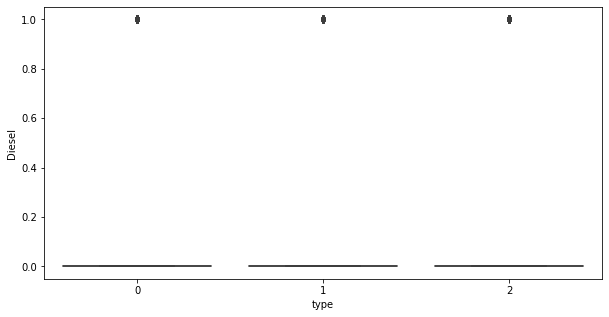

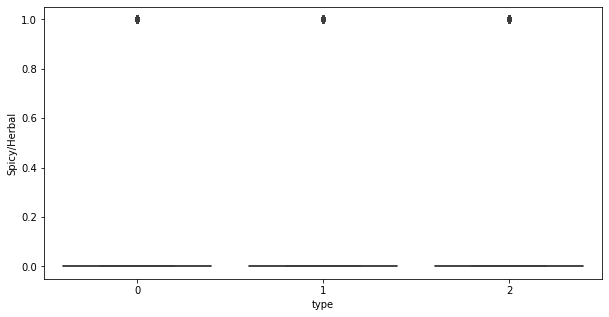

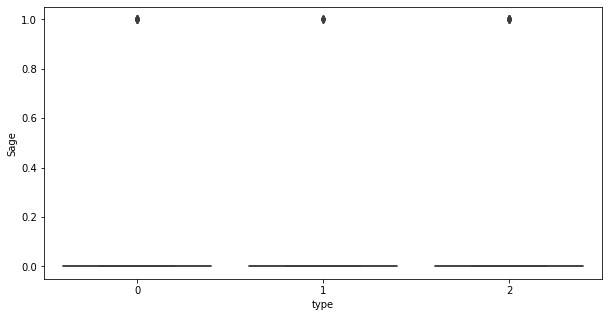

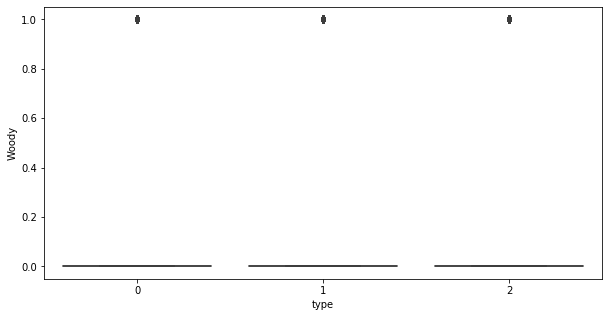

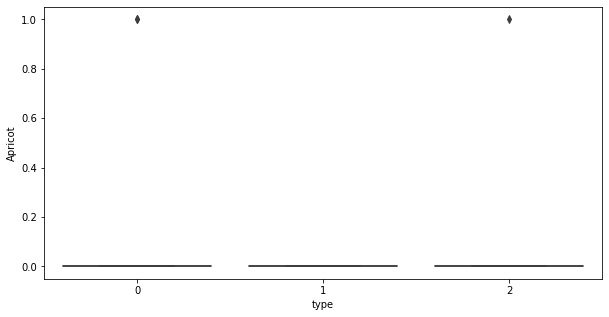

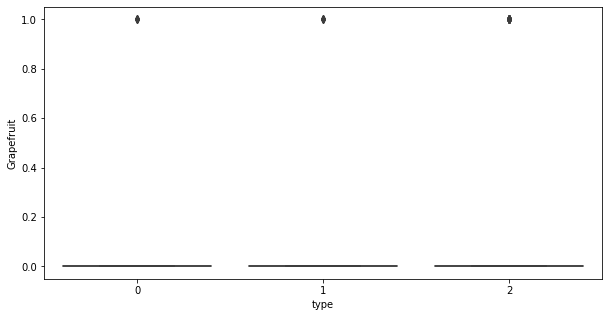

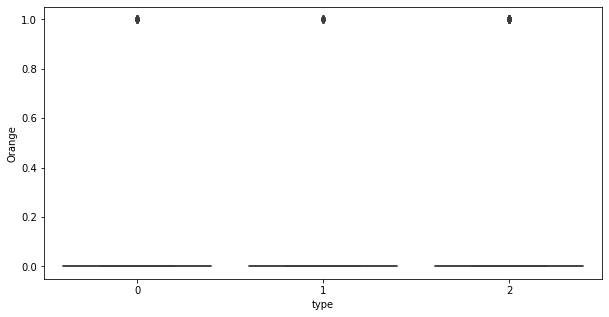

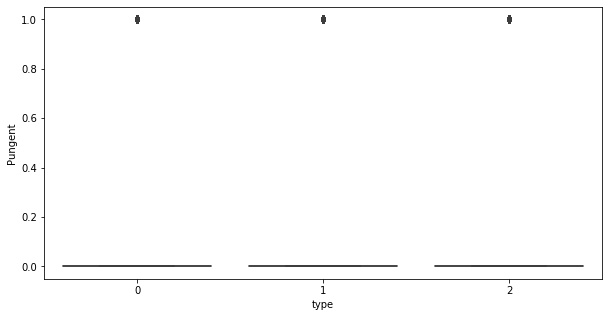

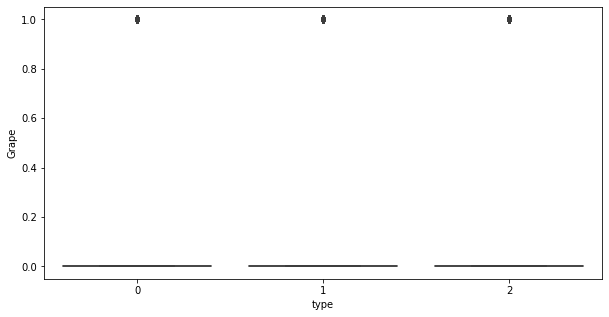

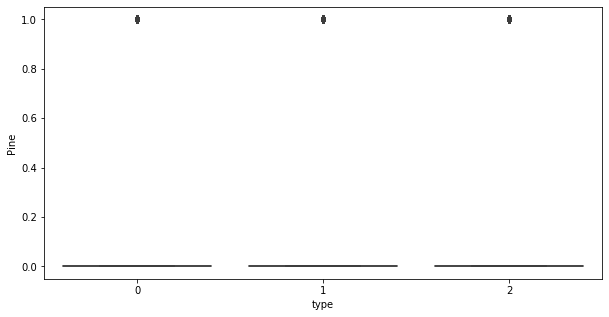

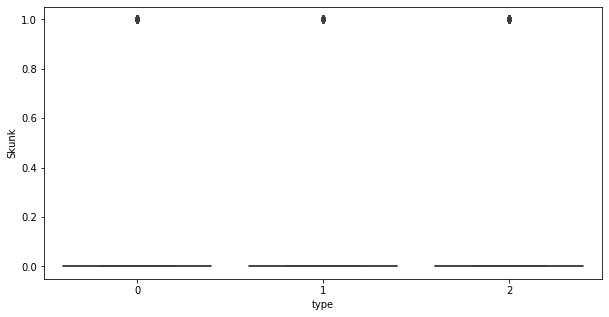

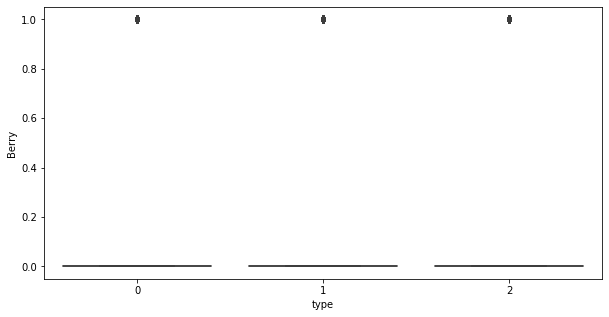

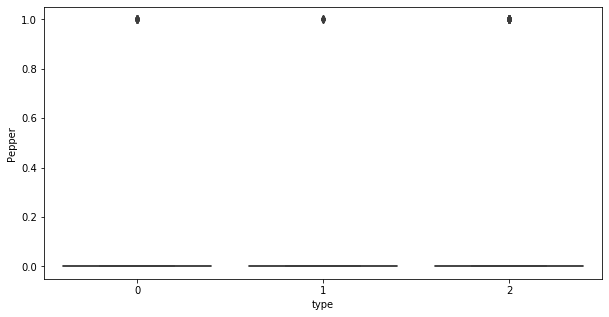

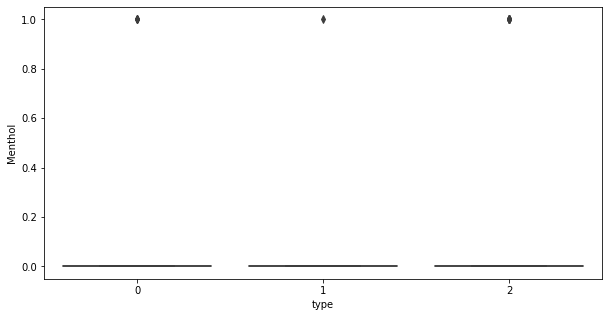

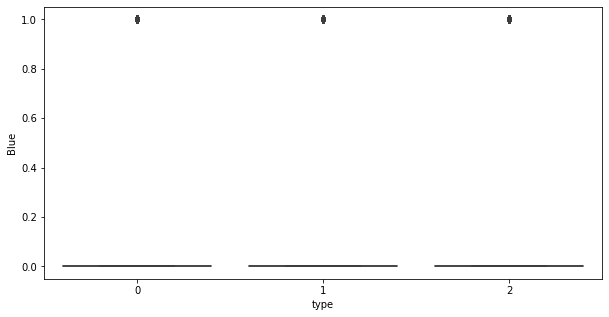

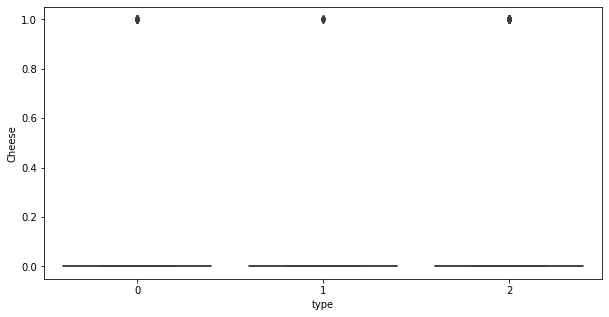

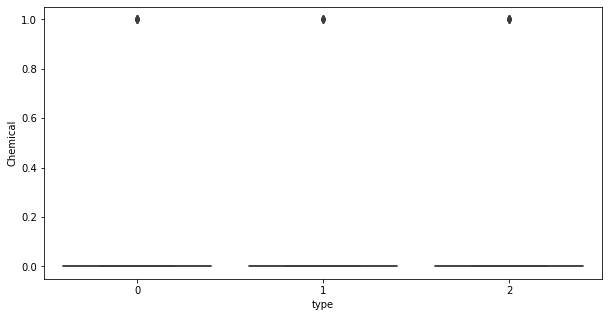

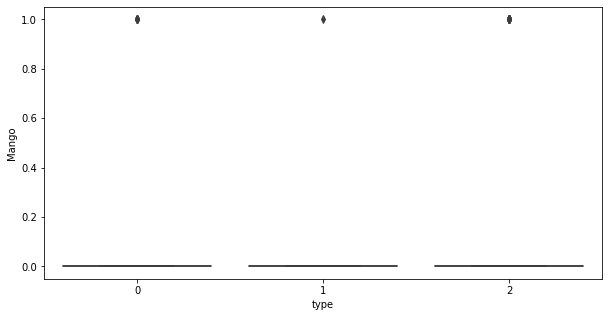

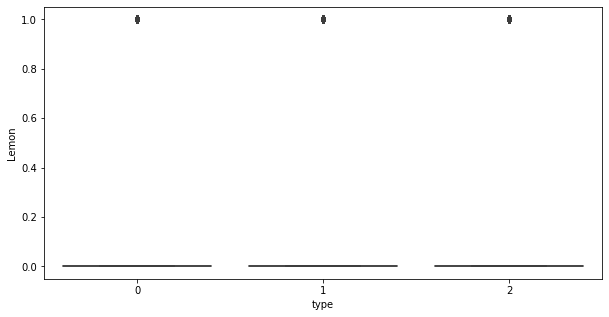

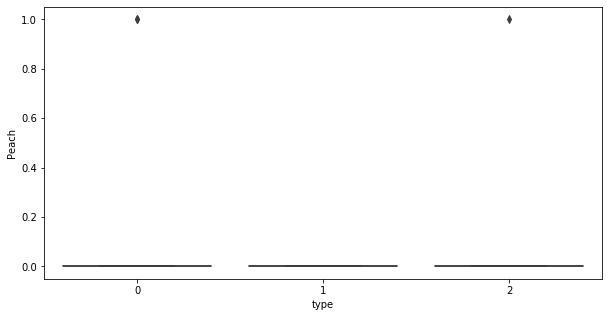

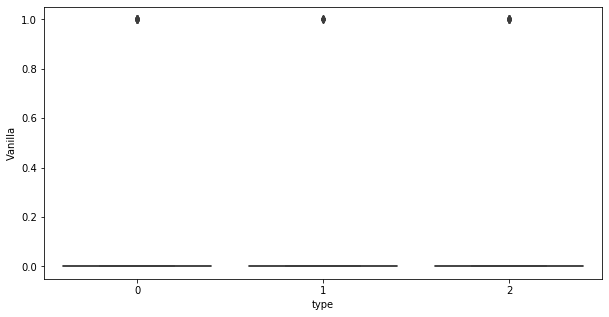

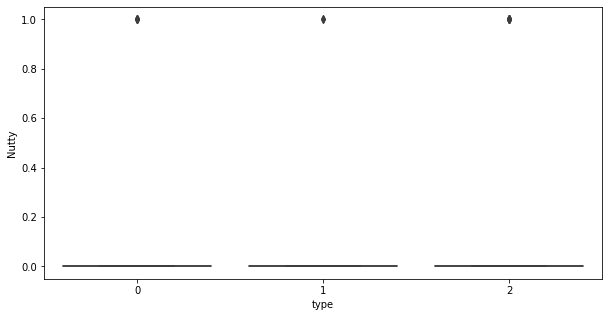

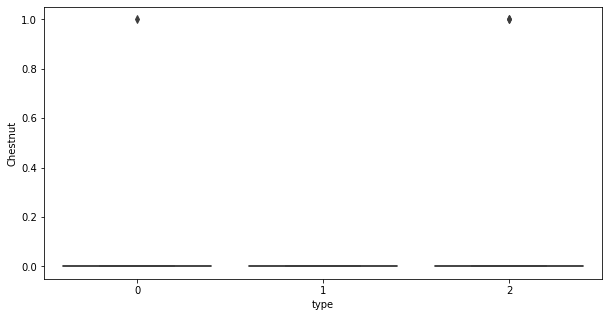

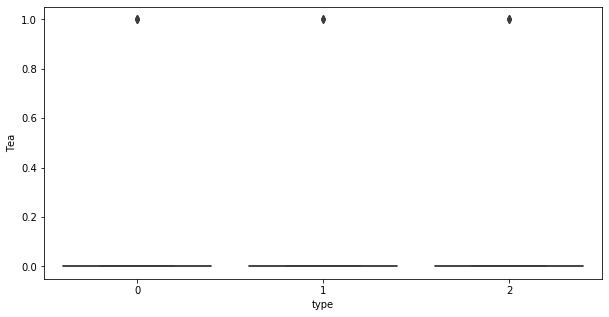

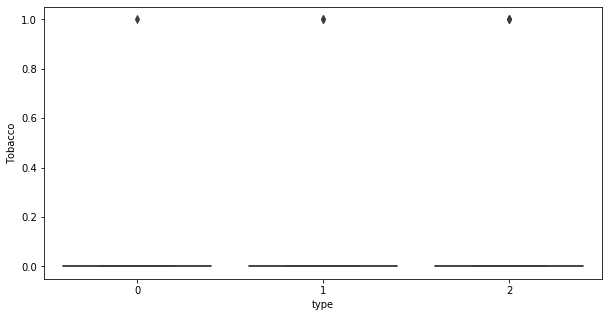

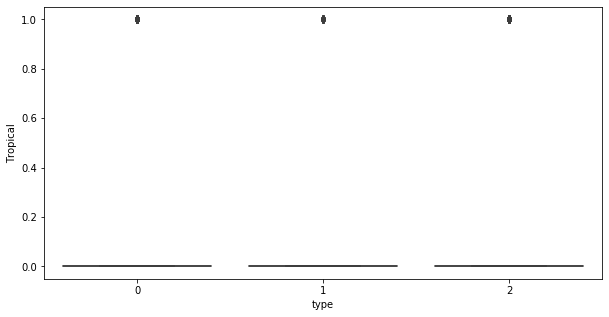

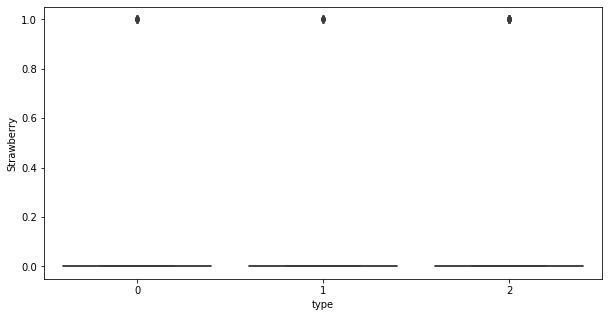

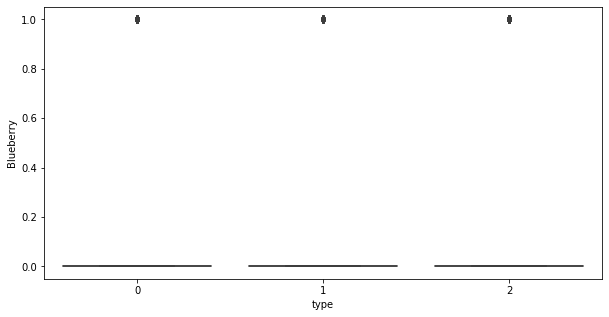

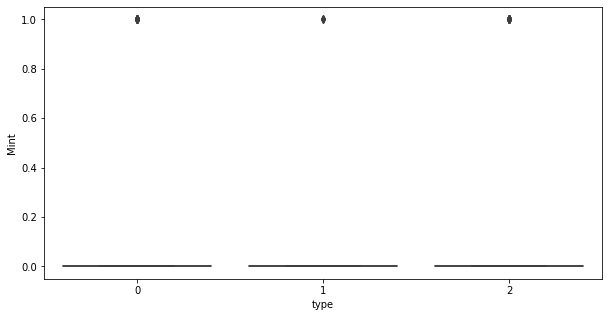

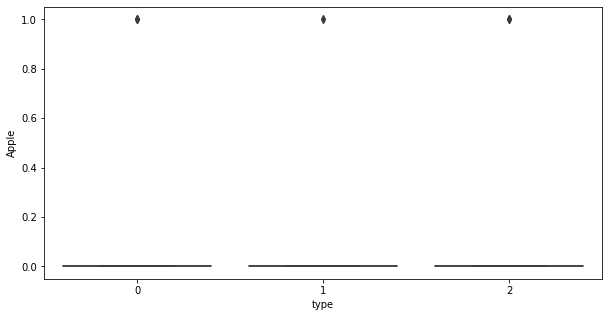

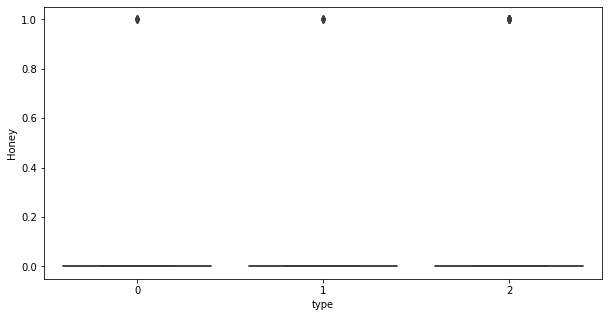

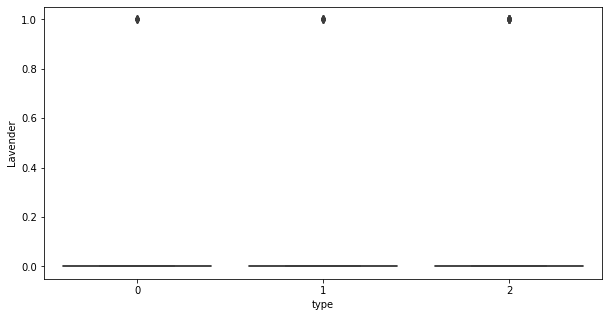

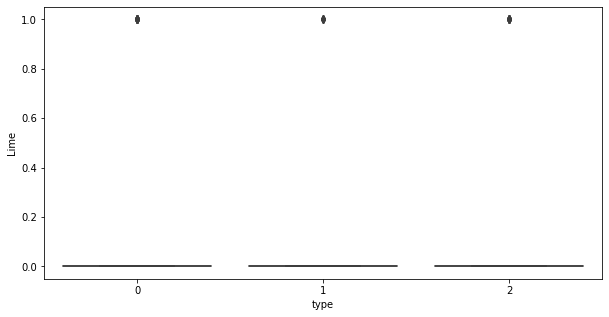

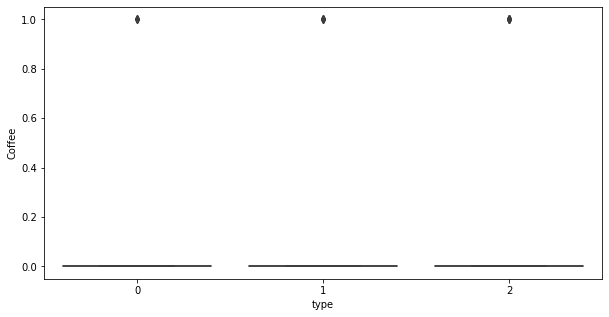

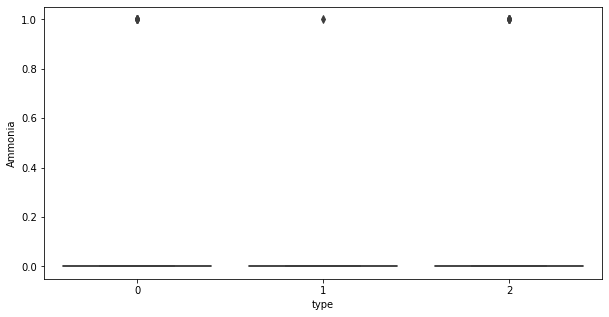

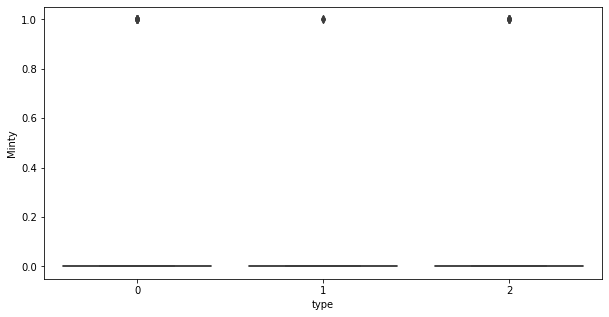

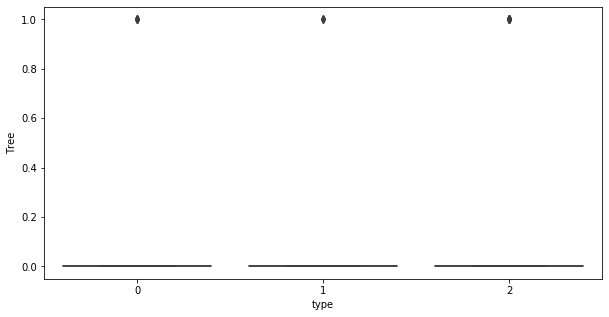

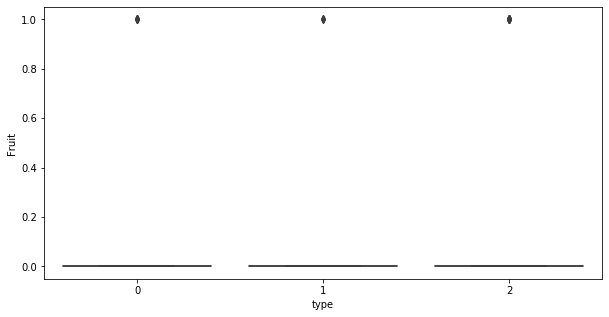

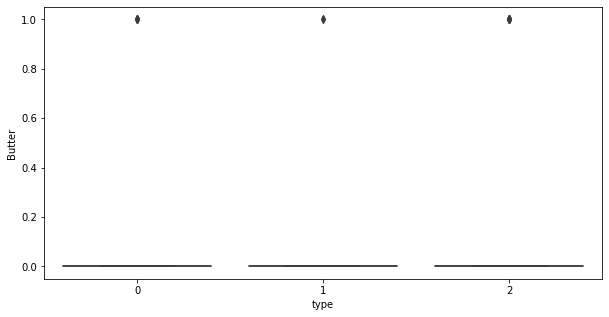

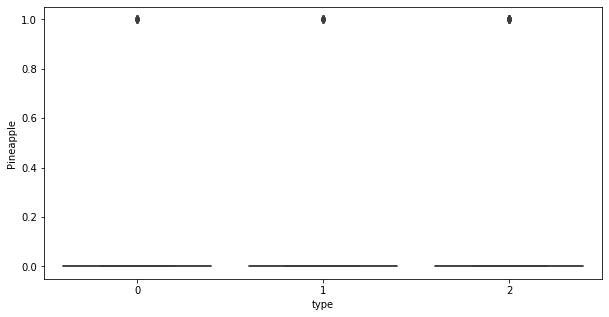

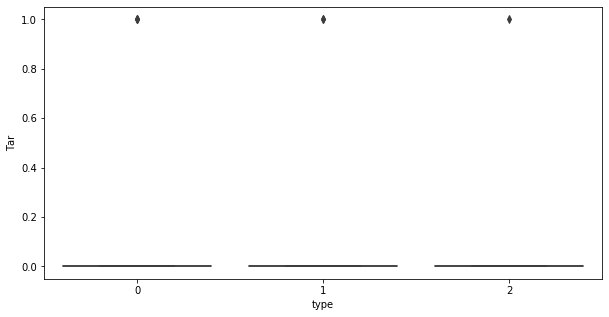

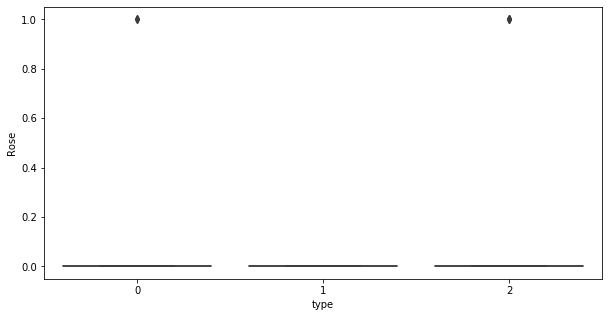

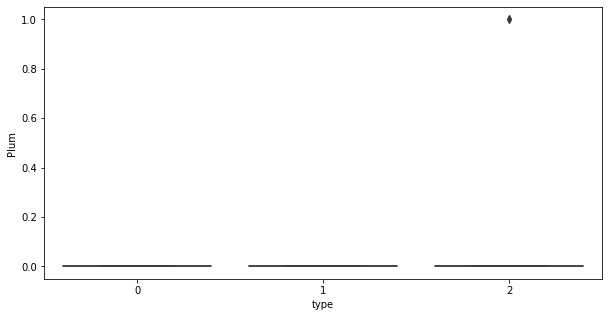

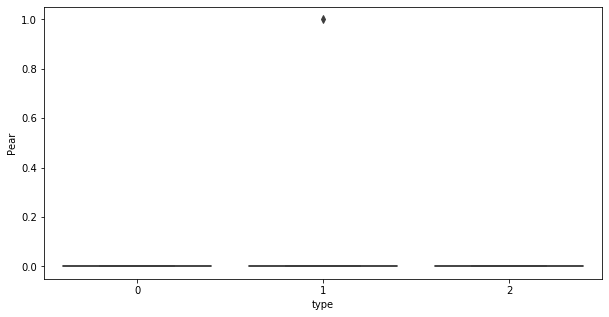

In [182]:
for t in tastes:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='type',y=t,data=df)

### Modeling Functions

In [76]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.metrics import auc, confusion_matrix, f1_score, roc_curve

In [123]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    print("Best Value for k: {}".format(best_k))
    print("Accuracy: {}".format(best_score))

In [80]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds,average=None)))
    print("Recall Score: {}".format(recall_score(test, preds,average=None)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds,average=None)))

In [81]:
def roc(classifier, X_train, X_test, y_train, y_test, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score=classifier.fit(X_train, y_train).predict(X_test)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [78]:
def plot_feature_importances(model,X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [77]:
def plot_corr_matrix(y_true,y_pred,classes,normalize=False,title=None,cmap=plt.cm.YlGn):
    #labels=['Sativa','Indica','Hybrid']
    cmat=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm=confusion_matrix(y_true,y_pred)
    fig, ax =plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Implementation

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve
from sklearn.metrics import auc, classification_report, confusion_matrix
from sklearn import tree, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.externals.six import StringIO 
# import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA  
from sklearn.linear_model import LogisticRegression

In [104]:
#Train Test Split
features=df.drop(columns=['name','rating','type'])
trainn=df.drop(columns=['name','rating'])
selected\eatures=['thc','cbd','Relaxed','Hungry','Sleepy','Depression','Insomnia','Pain','Euphoric','Creative','Energetic','Dry Mouth','Nausea','Uplifted','Fatigue','Focused']
# target=label_binarize(fulldf.type,classes=[0,1,2])
target=df.type
# n_classes=target.shape[1]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=42)
trainx=X_train[selectedfeatures]
testx=X_test[selectedfeatures]

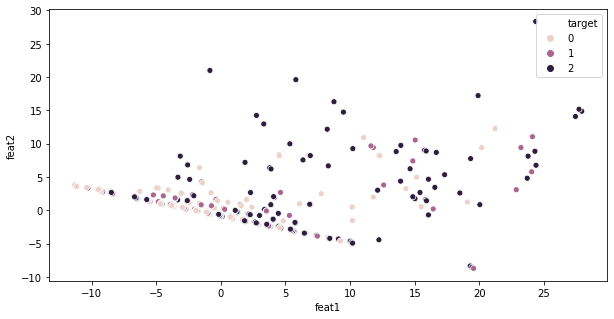

In [106]:
#PCA
pca = PCA()
features=df.drop(columns=['name','rating'])
transformed = pca.fit_transform(features)
pca.components_
pcadict={'feat1':transformed[:,0],'feat2':transformed[:,1]}
pcadf=pd.DataFrame(pcadict)
pcadf['target']=df['type']
pcadf.head()
plt.figure(figsize=(10,5))
sns.scatterplot(x='feat1',y='feat2',hue='target',data=pcadf)

pca.mean_
featurespca=pcadf.drop(columns='target')
targetpca=pcadf.target
Xptrain, Xptest, yptrain, yptest = train_test_split(featurespca, targetpca, test_size=0.25,random_state=42)

In [107]:
#Scale Training Features
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

Baseline Model Metrics:
Precision Score: [0.         0.         0.52525253]
Recall Score: [0. 0. 1.]
Accuracy Score: 0.5252525252525253
F1 Score: [0.         0.         0.68874172]
Predicted    2  All
True               
0          111  111
1           77   77
2          208  208
All        396  396
              precision    recall  f1-score   support

      indica       0.00      0.00      0.00       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.53      1.00      0.69       208

    accuracy                           0.53       396
   macro avg       0.18      0.33      0.23       396
weighted avg       0.28      0.53      0.36       396



<Figure size 720x432 with 0 Axes>

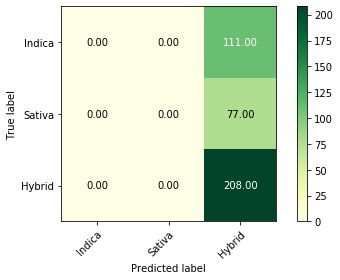

In [113]:
#Dummy Model (accuracy: 0.53)
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

dummy.fit(scaled_data_train, y_train)
basepreds=dummy.predict(scaled_data_test)
sc=dummy.score(scaled_data_test, y_test) 
print("Baseline Model Metrics:")
print_metrics(y_test,basepreds)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,basepreds,['Indica','Sativa','Hybrid'],'Baseline')
print(classification_report(y_test,basepreds,target_names=['indica','sativa','hybrid']))


Precision Score: [0.54310345 0.55319149 0.59656652]
Recall Score: [0.56756757 0.33766234 0.66826923]
Accuracy Score: 0.5757575757575758
F1 Score: [0.55506608 0.41935484 0.63038549]
Predicted    0   1    2  All
True                        
0           63   3   45  111
1            2  26   49   77
2           51  18  139  208
All        116  47  233  396
              precision    recall  f1-score   support

      indica       0.54      0.57      0.56       111
      sativa       0.55      0.34      0.42        77
      hybrid       0.60      0.67      0.63       208

    accuracy                           0.58       396
   macro avg       0.56      0.52      0.53       396
weighted avg       0.57      0.58      0.57       396



<Figure size 720x432 with 0 Axes>

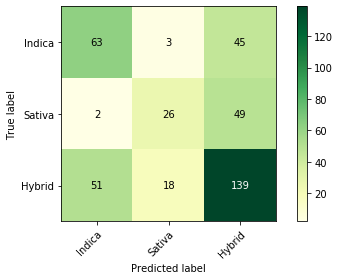

In [114]:
#Logistic Regression Baseline(Accuracy: 0.58)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(scaled_data_train, y_train)
y_pred=model_log.predict(scaled_data_test)
print_metrics(y_test,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))

Precision Score: [0.61682243 0.65957447 0.62809917]
Recall Score: [0.59459459 0.4025974  0.73076923]
Accuracy Score: 0.6287878787878788
F1 Score: [0.60550459 0.5        0.67555556]
Predicted    0   1    2  All
True                        
0           66   0   45  111
1            1  31   45   77
2           40  16  152  208
All        107  47  242  396
              precision    recall  f1-score   support

      indica       0.62      0.59      0.61       111
      sativa       0.66      0.40      0.50        77
      hybrid       0.63      0.73      0.68       208

    accuracy                           0.63       396
   macro avg       0.63      0.58      0.59       396
weighted avg       0.63      0.63      0.62       396



<Figure size 720x432 with 0 Axes>

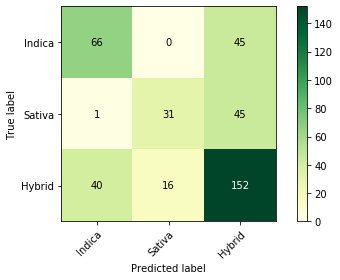

In [117]:
#Logistic Regression With Selected Features (accuracy: 0.63)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(trainx, y_train)
y_pred=model_log.predict(testx)
print_metrics(yptest,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))

Precision Score: [0.         0.         0.52525253]
Recall Score: [0. 0. 1.]
Accuracy Score: 0.5252525252525253
F1 Score: [0.         0.         0.68874172]
Predicted    2  All
True               
0          111  111
1           77   77
2          208  208
All        396  396
              precision    recall  f1-score   support

      indica       0.00      0.00      0.00       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.53      1.00      0.69       208

    accuracy                           0.53       396
   macro avg       0.18      0.33      0.23       396
weighted avg       0.28      0.53      0.36       396



<Figure size 720x432 with 0 Axes>

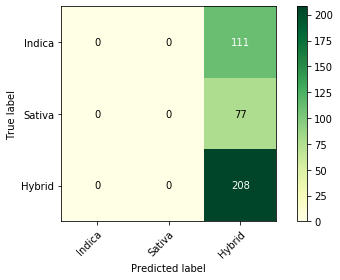

In [209]:
#Logistic Regression with PCA (Accuracy: 0.53b)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(Xptrain, yptrain)
y_pred=model_log.predict(Xptest)
print_metrics(yptest,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(yptest,y_pred,target_names=['indica','sativa','hybrid']))


Precision Score: [0.42176871 0.42307692 0.6142132 ]
Recall Score: [0.55855856 0.28571429 0.58173077]
Accuracy Score: 0.5176767676767676
F1 Score: [0.48062016 0.34108527 0.59753086]
              precision    recall  f1-score   support

      indica       0.42      0.56      0.48       111
      sativa       0.42      0.29      0.34        77
      hybrid       0.61      0.58      0.60       208

    accuracy                           0.52       396
   macro avg       0.49      0.48      0.47       396
weighted avg       0.52      0.52      0.51       396

Predicted    0   1    2  All
True                        
0           62  10   39  111
1           18  22   37   77
2           67  20  121  208
All        147  52  197  396


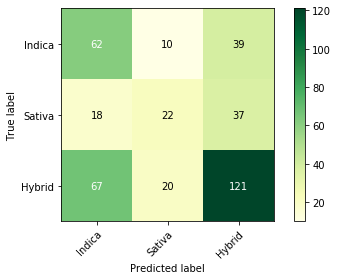

In [210]:
#KNN Baseline (Accuracy: 0.52)
clf1 = KNeighborsClassifier()
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Precision Score: [0.49324324 0.40322581 0.59139785]
Recall Score: [0.65765766 0.32467532 0.52884615]
Accuracy Score: 0.5252525252525253
F1 Score: [0.56370656 0.35971223 0.55837563]
              precision    recall  f1-score   support

      indica       0.49      0.66      0.56       111
      sativa       0.40      0.32      0.36        77
      hybrid       0.59      0.53      0.56       208

    accuracy                           0.53       396
   macro avg       0.50      0.50      0.49       396
weighted avg       0.53      0.53      0.52       396

Predicted    0   1    2  All
True                        
0           73   6   32  111
1            8  25   44   77
2           67  31  110  208
All        148  62  186  396


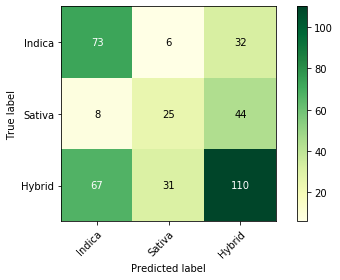

In [120]:
#KNN With Selected Features (Accuracy: 0.53)
clf1 = KNeighborsClassifier()
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
confusion_matrix(test_preds,y_test)
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])


Precision Score: [0.65322581 0.2745098  0.71945701]
Recall Score: [0.72972973 0.18181818 0.76442308]
Accuracy Score: 0.6414141414141414
F1 Score: [0.6893617  0.21875    0.74125874]
              precision    recall  f1-score   support

      indica       0.65      0.73      0.69       111
      sativa       0.27      0.18      0.22        77
      hybrid       0.72      0.76      0.74       208

    accuracy                           0.64       396
   macro avg       0.55      0.56      0.55       396
weighted avg       0.61      0.64      0.63       396

Predicted    0   1    2  All
True                        
0           81  13   17  111
1           18  14   45   77
2           25  24  159  208
All        124  51  221  396


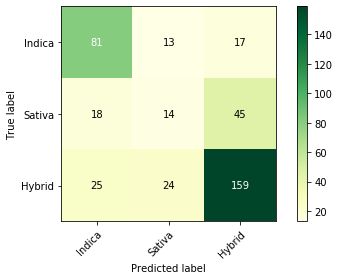

In [121]:
#KNN With PCA (Accuracy: 0.64)
clf1 = KNeighborsClassifier()
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
print(classification_report(yptest,test_preds,target_names=['indica','sativa','hybrid']))
confusion_matrix(test_preds,yptest)
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

In [212]:
df

,type,name,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,rating,None,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,thc,cbd
0,0,afpak,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,5,1,5,4.2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,african,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,5,1,5,3.9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,afternoon delight,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,5,4,6,4.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,afwreck,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,5,1,5,4.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,agent orange,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,4.2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,agent tangie,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,5,3,5,4.5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16
6,2,alaska,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,4.6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25
7,2,alaska thunder grape,1,0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,5,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14
8,2,alaskan ice,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,5,1,5,4.4,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24
9,0,alaskan thunder fuck,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,5,3,5,4.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12


In [218]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 1033 to 1188
Data columns (total 88 columns):
Relaxed             396 non-null int64
Hungry              396 non-null int64
Happy               396 non-null int64
Sleepy              396 non-null int64
Dizzy               396 non-null int64
Depression          396 non-null int64
Insomnia            396 non-null int64
Pain                396 non-null int64
Stress              396 non-null int64
Lack of Appetite    396 non-null int64
Euphoric            396 non-null int64
Creative            396 non-null int64
Energetic           396 non-null int64
Talkative           396 non-null int64
Dry Mouth           396 non-null int64
Nausea              396 non-null int64
Headache            396 non-null int64
Uplifted            396 non-null int64
Tingly              396 non-null int64
Paranoid            396 non-null int64
Cramps              396 non-null int64
Dry Eyes            396 non-null int64
Fatigue             396 non-null 

In [215]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 86 to 1126
Data columns (total 16 columns):
thc           1187 non-null int64
cbd           1187 non-null int64
Relaxed       1187 non-null int64
Hungry        1187 non-null int64
Sleepy        1187 non-null int64
Depression    1187 non-null int64
Insomnia      1187 non-null int64
Pain          1187 non-null int64
Euphoric      1187 non-null int64
Creative      1187 non-null int64
Energetic     1187 non-null int64
Dry Mouth     1187 non-null int64
Nausea        1187 non-null int64
Uplifted      1187 non-null int64
Fatigue       1187 non-null int64
Focused       1187 non-null int64
dtypes: int64(16)
memory usage: 157.6 KB


Best Value for k: 25
Accuracy: 0.5883838383838383
Precision Score: [0.50925926 0.75       0.58088235]
Recall Score: [0.4954955  0.15584416 0.75961538]
Accuracy Score: 0.5681818181818182
F1 Score: [0.50228311 0.25806452 0.65833333]
              precision    recall  f1-score   support

      indica       0.51      0.50      0.50       111
      sativa       0.75      0.16      0.26        77
      hybrid       0.58      0.76      0.66       208

    accuracy                           0.57       396
   macro avg       0.61      0.47      0.47       396
weighted avg       0.59      0.57      0.54       396

Predicted    0   1    2  All
True                        
0           55   0   56  111
1            7  12   58   77
2           46   4  158  208
All        108  16  272  396


<Figure size 720x360 with 0 Axes>

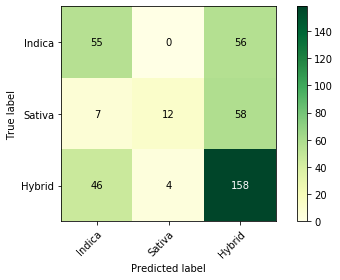

In [124]:
#Getting best KNN model (k=23, accuracy: 0.57)
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
clf1 = KNeighborsClassifier(n_neighbors=23)
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Best Value for k: 21
Accuracy: 0.5984848484848485
Precision Score: [0.6036036  0.68181818 0.60456274]
Recall Score: [0.6036036  0.19480519 0.76442308]
Accuracy Score: 0.6085858585858586
F1 Score: [0.6036036  0.3030303  0.67515924]
Mean Cross Validation Score: 59.48%
              precision    recall  f1-score   support

      indica       0.60      0.60      0.60       111
      sativa       0.68      0.19      0.30        77
      hybrid       0.60      0.76      0.68       208

    accuracy                           0.61       396
   macro avg       0.63      0.52      0.53       396
weighted avg       0.62      0.61      0.58       396

Predicted    0   1    2  All
True                        
0           67   0   44  111
1            2  15   60   77
2           42   7  159  208
All        111  22  263  396


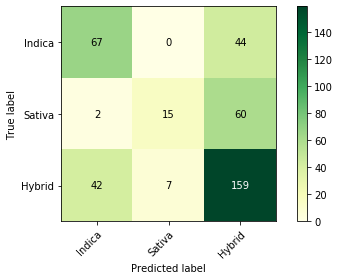

In [136]:
#Finding best k with selected features (k=40, accuracy: .61)
find_best_k(trainx, y_train, testx, y_test)
clf1 = KNeighborsClassifier(n_neighbors=40)
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Best Value for k: 1
Accuracy: 0.6565656565656566
Precision Score: [0.64655172 0.3164557  0.7960199 ]
Recall Score: [0.67567568 0.32467532 0.76923077]
Accuracy Score: 0.6565656565656566
F1 Score: [0.66079295 0.32051282 0.78239609]
Mean Cross Validation Score: 64.53%
              precision    recall  f1-score   support

      indica       0.65      0.68      0.66       111
      satica       0.32      0.32      0.32        77
      hybrid       0.80      0.77      0.78       208

    accuracy                           0.66       396
   macro avg       0.59      0.59      0.59       396
weighted avg       0.66      0.66      0.66       396

Predicted    0   1    2  All
True                        
0           75  24   12  111
1           23  25   29   77
2           18  30  160  208
All        116  79  201  396


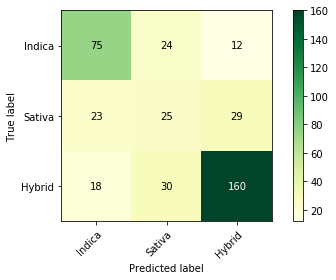

In [137]:
#Finding best k with PCA (k=1 accuracy: 0.66)
find_best_k(Xptrain, yptrain, Xptest, yptest)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(yptest,test_preds,['Indica','Sativa','Hybrid'])

In [138]:
#Grid Search for KNN (k=30, weights=uniform, accuracy: 0.5232)
model=KNeighborsClassifier()
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

Mean Cross Validation Score: 52.32%


In [160]:
dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

In [180]:
dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_val)

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [171]:
scaled_data_train.shape

(1187, 88)